# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [27]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']
print("Male Height mean: ", male_df['Height'].mean())
print("Male Height sd: ", male_df['Height'].std())
print("Male Weight mean: ", male_df['Weight'].mean())
print("Male Weight sd: ", male_df['Weight'].std())
print("Female Height mean: ", female_df['Height'].mean())
print("Female Height sd: ", female_df['Height'].std())
print("Female Weight mean: ", female_df['Weight'].mean())
print("Female Weight sd: ", female_df['Weight'].std())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean:  69.02634590621741
Male Height sd:  2.863362228660647
Male Weight mean:  187.0206206581932
Male Weight sd:  19.7811545167638
Female Height mean:  63.70877360342507
Female Height sd:  2.696284015765054
Female Weight mean:  135.86009300746835
Female Weight sd:  19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

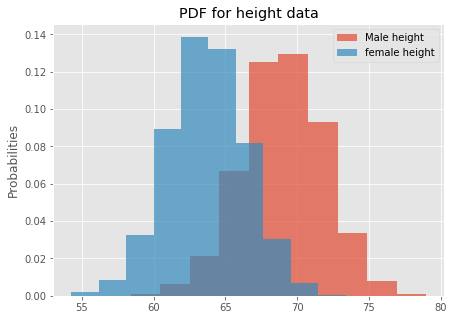

In [28]:
import numpy as np
n, bins = np.histogram(data.Height, 10, density=1)
n , bins



plt.figure(figsize=(7,5))
male_df.Height.plot.hist(bins = 10, density=1, label = 'Male height', alpha = 0.7)
female_df.Height.plot.hist(bins = 10, density=1, label = 'female height', alpha = 0.7)


plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for height data')
plt.show()

# Your code here

In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

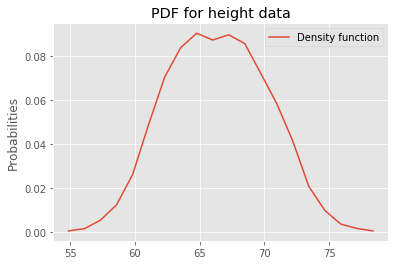

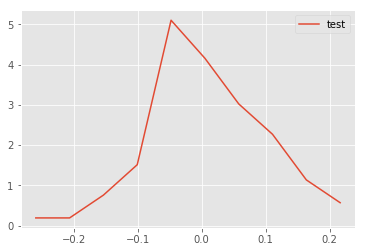

In [39]:
# Initialize numpy arrays according to number of bins with zeros to store interpolated values
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)

# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

# plot the calculated curve
plt.plot(pdfx, pdfy, label = 'Density function')
plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for height data')
plt.show()

def density(x, binsize):
    n, bins = np.histogram(x, binsize, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s, 10)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

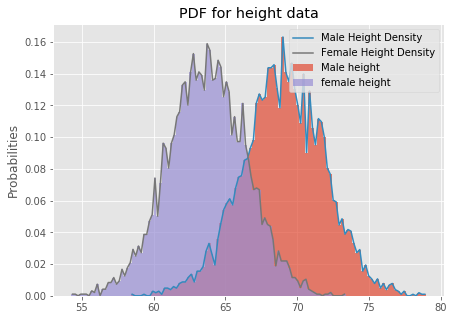

In [49]:
# Your code here 
binsize=100
n, bins = np.histogram(data.Height, binsize, density=1)

plt.figure(figsize=(7,5))
male_df.Height.plot.hist(bins = binsize, density=1, label = 'Male height', alpha = 0.7)
x,y = density(male_df.Height, binsize)
plt.plot(x,y, label = 'Male Height Density')
female_df.Height.plot.hist(bins = binsize, density=1, label = 'female height', alpha = 0.7)
a,b = density(female_df.Height, binsize)
plt.plot(a,b, label = 'Female Height Density')

plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for height data')
plt.show()


## Repeat the above exercise for male and female weights

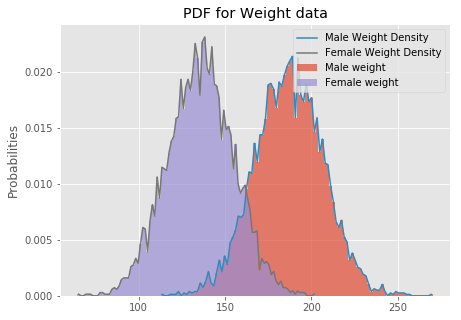

In [48]:
binsize=100
n, bins = np.histogram(data.Weight, binsize, density=1)


plt.figure(figsize=(7,5))
male_df.Weight.plot.hist(bins = binsize, density=1, label = 'Male weight', alpha = 0.7)
x,y = density(male_df.Weight, binsize)
plt.plot(x,y, label = 'Male Weight Density')
female_df.Weight.plot.hist(bins = binsize, density=1, label = 'Female weight', alpha = 0.7)
a,b = density(female_df.Weight, binsize)
plt.plot(a,b, label = 'Female Weight Density')

plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for Weight data')
plt.show()
# Your code here 

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

C:\Users\amurg\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Density Estimations')

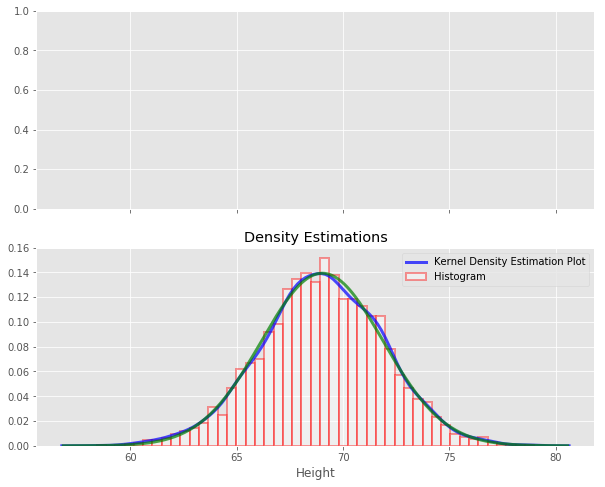

In [63]:
# Code for heights here
import seaborn as sns
import scipy.stats as stats
# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, figsize = (10,8) )


sns.distplot(male_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.7, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')


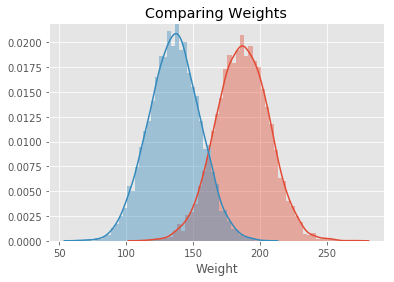

In [24]:
# Code for weights here

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.